<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/06wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

{{<video https://youtu.be/playlist?list=PLQqh36zP38-wTzMRmZzvr2TL12DNo6jXF&si=RnG6_-uhn9Yb57nU >}}

# 2. Imports

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fastai.vision.all 

# 3. torch.eigensum

## A. transpose

In [ ]:
tsr = torch.tensor([1,2,3,4]).reshape(2,2)
tsr

In [ ]:
tsr.t()

In [ ]:
torch.einsum('ij->ji',tsr)

## B. 행렬곱

In [ ]:
tsr1 = torch.arange(12).reshape(4,3).float()
tsr2 = torch.arange(15).reshape(3,5).float()

In [ ]:
tsr1.shape

In [ ]:
tsr2.shape

In [ ]:
tsr1 @ tsr2

In [ ]:
tsr1.matmul(tsr2)

In [ ]:
torch.einsum('ij,jk -> ik',tsr1,tsr2) 

In [ ]:
A = torch.arange(0,4)
B = torch.arange(2,6)
print(A)
print(B)

C = torch.einsum('i,i->',A,B)
print(C)

In [ ]:
A = torch.arange(0,4).reshape(4,1)
B = torch.arange(2,6).reshape(4,1)
print(A)
print(B)

C = torch.einsum('ij,ij->ij',A,B)
print(C)

In [ ]:
A = torch.arange(0,4)
_A=A.reshape(2,2)
torch.einsum('i->',A),torch.einsum('ij->',_A)

In [ ]:
A.sum()

## C. 이미지변환

In [ ]:
r = torch.zeros(16).reshape(4,4) + 1.0
g = torch.zeros(16).reshape(4,4) + 0.5
b = torch.zeros(16).reshape(4,4) + 0.5

In [ ]:
torch.stack([r,g,b],axis=-1).shape

In [ ]:
# plt 에서 보려면 channel이 맨 마지막에 와야한다.
plt.imshow(torch.stack([r,g,b],axis=-1)) 

In [ ]:
torch.stack([r,g,b],axis=0).shape

In [ ]:
r = torch.zeros(16).reshape(4,4) + 1.0
g = torch.zeros(16).reshape(4,4)
b = torch.zeros(16).reshape(4,4)
img_plt = torch.stack([r,g,b],axis=-1) # matplotlib 를 쓰기 위해서는 이미지가 이렇게 저장되어있어야한다.  
img_torch = torch.stack([r,g,b],axis=0).reshape(1,3,4,4) # torch를 쓰기 위해서는 이미지가 이렇게 저장되어있어야한다.  1: obs 2: ch 3: width 4: height

In [ ]:
# 두 데이터의 차원이 다르다.
img_plt.shape, img_torch.shape

In [ ]:
# TypeError: Invalid shape (1, 3, 4, 4) for image data
plt.imshow(img_torch)

In [ ]:
plt.imshow(img_plt)

만약에 `img_torch`를 matplotlib 으로 보고싶다면? 

In [ ]:
# 잘못된코드
plt.imshow(img_torch.reshape(4,4,3))

In [ ]:
# 올바른코드
plt.imshow(torch.einsum('ocij -> ijc',img_torch))   # shape (1, 3, 4, 4) -> (4, 4, 3) 으로 einsum을 이용하여 reshape


In [ ]:
# 올바른코드
plt.imshow(torch.einsum('ocwh->whc',img_torch)) # shape (1, 3, 4, 4) -> (4, 4, 3) 으로 einsum을 이용하여 reshape


# 4. MNIST -- 직접설계

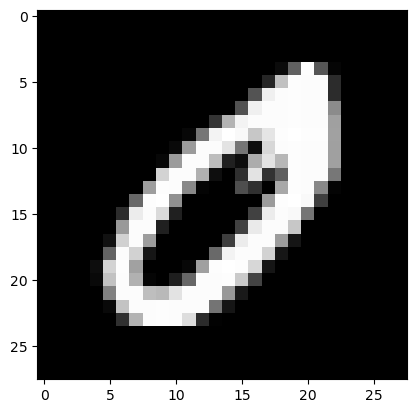

In [2]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
plt.imshow(torchvision.io.read_image(path/'training/0/41447.png').reshape(28,28,1),cmap="gray")

In [48]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
X = torch.concat([X0,X1,X2])/255        # X를 0~1 사이의 float로 변환
y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()  # y는 float
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
XX = torch.concat([X0,X1,X2])/255
yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [45]:
X0.shape

torch.Size([980, 1, 28, 28])

In [49]:
print(X.shape,'\t',X.dtype)     # X 가 int 이면 torch에서 학습이 불가능하다. 강의 11분30초에서 언급
print(y.shape,'\t',y.dtype)     # onehot encoding 할거기에 y는 float타입
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t',yy.dtype)

torch.Size([18623, 1, 28, 28]) 	 torch.float32
torch.Size([18623, 3]) 	 torch.float32
torch.Size([3147, 1, 28, 28]) 	 torch.float32
torch.Size([3147, 3]) 	 torch.float32


In [ ]:
# # 꼭 X 를 255로 나눠줄 필요는 없긴하다. X가 float 타입이고 y또한 onehot방식이니 float 타입이기만 하면 된다.
# path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
# X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
# X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
# X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
# X = torch.concat([X0,X1,X2]).float()        # X를 0~1 사이의 float로 변환
# y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()  # y는 float
# X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
# X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
# X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
# XX = torch.concat([X0,X1,X2]).float()
# yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [ ]:
X0.shape , X.shape , X.dtype , y.dtype

In [ ]:
torchvision.io.read_image((path/'training/0').ls()[0])

In [ ]:
torchvision.io.read_image((path/'training/0').ls()[0]).shape

In [ ]:
X[0]

In [ ]:
plt.imshow(torch.einsum('cwh->whc',X[0]))

In [ ]:
torchvision.io.read_image((path/'training/0').ls()[0]).shape

In [ ]:
plt.imshow(torchvision.io.read_image((path/'training/0').ls()[0]))

In [ ]:
plt.imshow(torchvision.io.read_image((path/'training/0').ls()[0]).reshape(28,28,1))

In [ ]:
# plt.imshow(torchvision.io.read_image((path/'training/0').ls()[0]).reshape(28,28,1))
plt.imshow(torch.einsum('cwh->whc',torchvision.io.read_image((path/'training/0').ls()[0])))

In [ ]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST) 
[torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()]

In [ ]:
plt.imshow(torch.einsum('cij -> ijc',X[0]),cmap="gray")

## A. y: (n,3)-float 

In [76]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.MNIST)
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
X = torch.concat([X0,X1,X2])/255        # X를 0~1 사이의 float로 변환
y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()  # y는 float
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
XX = torch.concat([X0,X1,X2])/255
yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [ ]:
torch.manual_seed(5) 
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,3),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
print(f'train: {(net(X).data.argmax(axis=1) == y.argmax(axis=1)).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy.argmax(axis=1)).float().mean():.4f}')

In [ ]:
yhat

In [ ]:
net1(X).shape

In [ ]:
torch.manual_seed(5) 

ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)

dl1 = torch.utils.data.DataLoader(ds1,batch_size=128)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=128)

net=torch.nn.Sequential(
    torch.nn.Conv2d(1,16,kernel_size=(2,2)),    # torch.Size([18623, 16, 27, 27])
    torch.nn.ReLU(),                            # torch.Size([18623, 16, 27, 27])
    torch.nn.MaxPool2d(kernel_size=(2,2)),      # torch.Size([18623, 16, 13, 13])
    torch.nn.Flatten(),                         # torch.Size([18623, 2704])
    torch.nn.Linear(2704,3),                    # torch.Size([18623, 3])
    # softmax
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(10):
    for xi,yi in dl1:
        yhat=net(xi.to("cuda:0"))
        loss=loss_fn(yhat,yi.to("cuda:0"))
        loss.backward()
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
print(f'train: {(net(X).data.argmax(axis=-1) == y.argmax(axis=-1)).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=-1) == yy.argmax(axis=-1)).float().mean():.4f}')

In [ ]:
for xi,yi in dl:
    print(f'x_batch={len(xi.tolist())} \t y_batch={len(yi.tolist())}')
    
# for xi,yi in dl:
#     print(f'x_batch={xi.tolist()} \t y_batch={yi.tolist()}')

In [ ]:
X[0].shape , X[[0]].shape

In [ ]:
X[0].unsqueeze(0).shape

In [ ]:
net(X[[0]])

In [ ]:
net(X[0].unsqueeze(0))

## B. y: (n,)-int

In [ ]:
y.shape , y , y.dtype

In [ ]:
# y를 int로 형변환.
y = y.argmax(axis=-1)
yy = yy.argmax(axis=-1)
y.dtype

In [ ]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)   # 원핫 인코딩이 아니라 y가 int 타입
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

In [ ]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)   # 원핫 인코딩이 아니라 y가 int 타입
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

In [75]:
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,3),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
# print(f'train: {(net(X).data.argmax(axis=-1) == y.argmax(axis=-1)).float().mean():.4f}')
print(f'train: {(net(X).data.argmax(axis=1) == y).float().mean():.4f}') # <-- 여기수정

# print(f'val: {(net(XX).data.argmax(axis=-1) == yy.argmax(axis=-1)).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy).float().mean():.4f}') # <-- 여기수정

AttributeError: 'list' object has no attribute 'size'

## C. y: (n,)-int , 클래스가 10

### torch

In [95]:
labels=[str(labels).split('/')[-1] for labels in (path/'training').ls()]
labels = sorted(labels)

X = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in ((path/f'training/{l}').ls())]).float()/255
y = torch.tensor([i for i,l in enumerate(labels) for fname in ((path/f'training/{l}').ls())])
XX = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in ((path/f'testing/{l}').ls())]).float()/255
yy = torch.tensor([i for i,l in enumerate(labels) for fname in ((path/f'testing/{l}').ls())])

In [92]:
X.shape , X.dtype ,y.shape , y.dtype

(torch.Size([60000, 1, 28, 28]),
 torch.float32,
 torch.Size([60000]),
 torch.int64)

In [133]:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)

dl1 = torch.utils.data.DataLoader(ds1,batch_size=128,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=128)


net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,kernel_size=(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(2,2)),
    torch.nn.Flatten()
) 
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,10)
)
net = torch.nn.Sequential(
    net1,
    net2
).to("cuda:0")
loss_fn  = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(5):
    for x_i,y_i in dl1:
        yhat = net(x_i.to("cuda:0"))
        loss = loss_fn(yhat,y_i.to("cuda:0"))
        loss.backward()
        optimizr.step()
        optimizr.zero_grad()

print(f' 정확도 : {(net(X.to("cuda:0")).argmax(-1) == y.to("cuda:0")).float().mean()}')

 정확도 : 0.9864166975021362


 X[sample]의 inference : 9


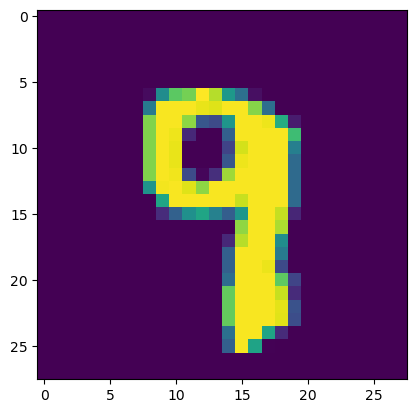

In [135]:
sample = 57000
net.to("cpu")
print(f' X[sample]의 inference : {net(torch.stack([X[sample]])).argmax()}')
plt.imshow(torch.einsum('ijkl -> kl', torch.stack([X[sample]])))

### fastai

In [164]:
import fastai.metrics
import torch

torch.manual_seed(5) 
# 데이터셋 정의
ds1 = torch.utils.data.TensorDataset(X, y)
ds2 = torch.utils.data.TensorDataset(XX, yy)

# 데이터로더 정의
dl1 = torch.utils.data.DataLoader(ds1, batch_size=200, shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2, batch_size=128)

# fastai DataLoader
dls = fastai.data.core.DataLoaders(dl1, dl2)

# 네트워크 정의 (Batch Normalization 추가)
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, kernel_size=(5, 5)),
    # torch.nn.BatchNorm2d(16),  # BatchNorm2d 추가
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(2, 2)),
    torch.nn.Flatten()
)

net2 = torch.nn.Sequential(
    torch.nn.Linear(2304, 10)
)

# 두 개의 네트워크를 이어 붙인 전체 모델
net_fast = torch.nn.Sequential(
    net1,
    net2
)

# 손실 함수 정의
loss_fn = torch.nn.CrossEntropyLoss()

# Learner 정의
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net_fast,
    loss_func=loss_fn,
    metrics=[fastai.metrics.accuracy]
)

# 모델 학습
lrnr.fit(10)

# 모델을 CPU로 이동하여 예측 정확도 출력
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')


epoch,train_loss,valid_loss,accuracy,time
0,0.192893,0.145338,0.959700,00:00
1,0.099630,0.087165,0.973600,00:00
2,0.078297,0.067179,0.979500,00:00
3,0.063822,0.057957,0.981100,00:00
4,0.054466,0.054744,0.981800,00:00
5,0.049633,0.049708,0.984000,00:00
6,0.046544,0.048298,0.983700,00:00
7,0.041591,0.046596,0.984100,00:00
8,0.037582,0.043116,0.986100,00:00
9,0.034571,0.042802,0.986000,00:00


train: 0.9920
val: 0.9860


# 5. Fashion-MNIST -- fastai

`-` Data

In [165]:
df_train=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_train.csv')
df_test=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_test.csv')
def rshp(row):
    return row.reshape(1,28,28)
X = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_train.iloc[:,1:]))).float()
XX  = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_test.iloc[:,1:]))).float()
y = torch.tensor(np.array(df_train.label))
yy  = torch.tensor(np.array(df_test.label))

In [ ]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t\t',y.dtype)     # dtype 이 int 형 (one hot encoding형태가 아님)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t\t',yy.dtype)   # dtype 이 int 형 (one hot encoding형태가 아님)

In [ ]:
plt.imshow(torch.einsum('cij -> ijc',X[0]),cmap="gray")

In [ ]:
plt.imshow(torch.einsum('cij -> ijc',X[-1]),cmap="gray")

y의 class는 총 10개. 따라서 softmax도 최종 출력층은 10개가 되어야 한다.

In [ ]:
set(y.tolist())

## A. torch

In [166]:
# Step1: 데이터정리 (dls생성)
ds = torch.utils.data.TensorDataset(X,y)
dl = torch.utils.data.DataLoader(ds,batch_size=128) 
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,10),   # 10으로 최종 클래스 바꿈
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# Step3: 적합 
net.to("cuda:0")
for epoc in range(10):
    for xi,yi in dl:
        ## 1
        ## 2
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
net.to("cpu")
# Step4: 예측 및 평가 
print(f'train: {(net(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(net(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

train: 0.9150
val: 0.8744


## B. fastai

In [167]:
X.shape[0] / 128

468.75

In [ ]:
fastai.learner.Learner?

In [ ]:
y.dtype

In [ ]:
# Step1: 데이터정리 (dls생성)
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=128) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)   # validation인데도 batch_size가 있는 이유? : 효율적인 gpu 메모리를 사용하기 위해. (학습속도를 빠르게 하려는건 아니다.)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2: 적합에 필요한 오브젝트 생성
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2304,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
#optimizr = torch.optim.Adam(net.parameters())
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    # torch.Size([60000, 1, 28, 28])
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3: 적합 
lrnr.fit(10)
# Step4: 예측 및 평가 

lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

In [ ]:
list(lrnr.model.parameters())

# 6. ImageNet -- 직접설계/transfer 

## A. 알렉스넷[@krizhevsky2012imagenet]의 의미

`-` 야사로 배우는 인공지능: <https://brunch.co.kr/@hvnpoet/109>

## B. 알렉스넷의 아키텍처 써보기 

`-` 알렉스넷의 아키텍처: 

-ref: <https://en.wikipedia.org/wiki/AlexNet#:~:text=AlexNet%20is%20the%20name%20of,at%20the%20University%20of%20Toronto.>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/960px-Comparison_image_neural_networks.svg.png)

`-` 재미삼아 써보면.. 

In [ ]:
img = torch.zeros(1,3*227*227).reshape(1,3,227,227)
img.shape , img.dtype

In [ ]:
plt.imshow(torch.einsum('ocij ->ijc',img),cmap="gray")

In [ ]:

img = torch.zeros(1,3*227*227).reshape(1,3,227,227)

net = torch.nn.Sequential(
    torch.nn.Conv2d(3,96,kernel_size=(11,11),stride=4),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(3,3),stride=2), # default stride는 3
    torch.nn.Conv2d(96,256,kernel_size=(5,5),padding=2), # image의 width 와 height 를 그대로 27x27로 유지하기 위해 padding
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(3,3),stride=2),
    torch.nn.Conv2d(256,384,kernel_size=(3,3),padding=1,),
    torch.nn.ReLU(),
    torch.nn.Conv2d(384,384,kernel_size=(3,3),padding=1),
    torch.nn.ReLU(),
    torch.nn.Conv2d(384,256,kernel_size=(3,3),padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(3,3),stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(9216,4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096,4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096,1000),
)
#net(img).shape , plt.imshow(torch.einsum('ocij ->ijc',img),cmap="gray")

`-` 참고사항: `torchvision.models.alexnet()`을 이용하여 네크워크를 선언할 수도 있음. 

In [ ]:
torchvision.models.alexnet()

::: {.callout-note}
직접구현한 알렉스넷과 `torchvision.models.alexnet()`를 이용한 알렉스넷은 약간다름. 

그 이유는 파이토치에서는 원래 논문에서 구현된 알렉스넷이 아니라 이후 수정된 알렉스넷을 사용하기 때문임. 이 내용은 파이토치 공식홈페이지에서 아래와 같이 명시되어있음. 

```
AlexNet was originally introduced in the ImageNet Classification with Deep Convolutional Neural Networks paper. Our implementation is based instead on the “One weird trick” paper above.
```

ref: <https://pytorch.org/vision/main/models/generated/torchvision.models.alexnet.html>
:::

## C. 알렉스넷으로 ImageNet 적합

In [ ]:
pass # 데이터가 너무 커서.. 코랩에서 못할것같아요

# 7. CIFAR10 -- transfer

## A. `dls` 만들자

`-` X,y를 얻자. 

In [4]:
path = fastai.data.external.untar_data(fastai.data.external.URLs.CIFAR)
path.ls()

(#3) [Path('/home/myuser/.fastai/data/cifar10/train'),Path('/home/myuser/.fastai/data/cifar10/test'),Path('/home/myuser/.fastai/data/cifar10/labels.txt')]

In [ ]:
!cat /home/myuser/.fastai/data/cifar10/labels.txt

In [ ]:
from pathlib import Path

In [ ]:
list(Path('/home/myuser/.fastai/data/cifar10/train').ls())

In [ ]:
labels=[str(l).split('/')[-1] for l in (path/'train').ls()]

In [ ]:
[fname for fname in (path/'train'/f'{labels[0]}').ls()]

In [ ]:
type([fname for fname in Path('/home/myuser/.fastai/data/cifar10/train').ls()]) , type(list(Path('/home/myuser/.fastai/data/cifar10/train').ls()))

In [ ]:
[fname for fname in Path('/home/myuser/.fastai/data/cifar10/train').ls()] == list(Path('/home/myuser/.fastai/data/cifar10/train').ls())

In [ ]:
torchvision.io.read_image(Path('/home/myuser/.fastai/data/cifar10/train/cat/10255_cat.png'))/255 # float로 형변환

In [ ]:
plt.imshow(torch.einsum('cij->ijc',torchvision.io.read_image(Path('/home/myuser/.fastai/data/cifar10/train/cat/10255_cat.png'))))
_cat1=torch.einsum('cij->ijc',torchvision.io.read_image(Path('/home/myuser/.fastai/data/cifar10/train/cat/10255_cat.png')))
_cat1.shape

In [ ]:
torch.stack([_cat1]).shape

In [ ]:
torch.stack([torchvision.io.read_image(str(fname)) for fname in (Path('/home/myuser/.fastai/data/cifar10/train/cat').ls())])
# X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])

In [ ]:
#torch.stack(torchvision.io.read_image(str(list(Path('/home/myuser/.fastai/data/cifar10/train/cat').ls()))))
# 리스트의 각 파일 경로에 대해 torchvision.io.read_image를 호출하여 텐서를 반환하고, 이를 torch.stack으로 쌓음
torch.stack(list(map(lambda fname: torchvision.io.read_image(str(fname)), Path('/home/myuser/.fastai/data/cifar10/train/cat').ls())))

In [ ]:
[label for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()] == list(Path('/home/myuser/.fastai/data/cifar10/train').ls())

In [3]:
labels = [str(l).split('/')[-1] for l in (path/'train').ls()]
labels

['frog',
 'dog',
 'horse',
 'cat',
 'airplane',
 'automobile',
 'ship',
 'deer',
 'bird',
 'truck']

labels = [str(l).split('/')[-1] for l in (path/'train').ls()] 에 대한 설명

In [ ]:
Path('/home/myuser/.fastai/data/cifar10/train')

In [ ]:
Path('/home/myuser/.fastai/data/cifar10/train').ls()    # list와 비슷함 따라서 comprehension도 가능

In [ ]:
[Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

In [ ]:
[label for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

In [ ]:
[str(label) for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

In [ ]:
[str(label).split('/') for label in Path('/home/myuser/.fastai/data/cifar10/train').ls()]    # list와 비슷함 따라서 comprehension도 가능

In [5]:
labels = [str(l).split('/')[-1] for l in (path/'train').ls()]
labels

['ship',
 'deer',
 'airplane',
 'cat',
 'truck',
 'bird',
 'frog',
 'dog',
 'automobile',
 'horse']

In [ ]:
l='cat'
fname='10255_cat.png'
torchvision.io.read_image(f'/home/myuser/.fastai/data/cifar10/train/{l}/{fname}')

In [ ]:
path , labels

In [6]:
X = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in (path/f'train/{l}').ls()],axis=0).float()/255
XX = torch.stack([torchvision.io.read_image(str(fname)) for l in labels for fname in (path/f'test/{l}').ls()],axis=0).float()/255
y = torch.tensor([i for i,l in enumerate(labels) for fname in (path/f'train/{l}').ls()])
yy = torch.tensor([i for i,l in enumerate(labels) for fname in (path/f'test/{l}').ls()])

In [ ]:
y , y.dtype , X.shape

In [ ]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t\t',yy.dtype)

`-` 데이터를 시각화해보자. 

In [ ]:
ylabel = [l for l in labels for fname in (path/f'train/{l}').ls()]
i = 30002
plt.imshow(torch.einsum('cij->ijc',X[i]))
plt.title(f'{ylabel[i]},{y[i]}')

- 그림이 너무 어려운데? 
- 맞추기 힘들겠는데.. 

`-` dls를 만들자. 

In [7]:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)

`-` 아래와 같이 쉽게 만들수도있음... 

In [ ]:
# dls = fastai.vision.data.ImageDataLoaders.from_folder(path,train='train',valid='test')
# dls.show_batch()

## B. 수제네트워크로 학습

`-` 시도1: 이게 좀 힘들어요 ㅎㅎ

In [172]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(3136,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

epoch,train_loss,valid_loss,accuracy,time
0,2.426586,2.300822,0.100000,00:00
1,2.402122,2.298293,0.107100,00:00
2,2.512521,2.295981,0.127700,00:00
3,2.823177,2.297400,0.120600,00:00
4,5.296788,2.272974,0.162100,00:00
5,2.678270,2.283129,0.137100,00:00
6,2.456698,2.278770,0.148600,00:00
7,2.426718,2.258300,0.125700,00:00
8,2.281897,3.010326,0.118500,00:00
9,2.208364,4.467347,0.160900,00:00


train: 0.1612
val: 0.1609


- train loss 는 줄어드는데 validation loss 는 늘어난다?  
    - 전형적인 overfitting이 일어났다는 말
    - 모델이 너무 복잡한가보다.. 모델을 더 간단하게 만들어볼까?
    - 아니면 dropout을 해볼까?

`-` 시도2: 셔플!

In [178]:
# Step1:
torch.manual_seed(5)
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,16,(5,5)),
    # torch.nn.BatchNorm2d(16),  # BatchNorm2d 추가
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(3136,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

epoch,train_loss,valid_loss,accuracy,time
0,1.572572,1.494848,0.481400,00:00
1,1.404309,1.395495,0.508800,00:00
2,1.321636,1.328628,0.533400,00:00
3,1.284444,1.292992,0.554200,00:00
4,1.241136,1.270820,0.556900,00:00
5,1.199869,1.230174,0.572800,00:00
6,1.169258,1.217521,0.575900,00:00
7,1.136352,1.168456,0.596200,00:00
8,1.111384,1.159994,0.596000,00:00
9,1.104794,1.164575,0.599700,00:00


train: 0.6313
val: 0.5997


- 셔플의 차이가 이렇게 크다니??

`-` 시도3: 복잡하게..

In [180]:
torch.manual_seed(5)
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,256,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(256,64,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64,16,(5,5)),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(1600,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
# lrnr.model.to("cpu")
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X, y), batch_size=64)
train_correct = 0
train_total = 0
lrnr.model.to("cuda")  # 모델을 GPU로 이동

for xb, yb in train_loader:
    xb, yb = xb.to("cuda"), yb.to("cuda")
    preds = lrnr.model(xb).data.argmax(axis=1)
    train_correct += (preds == yb).sum().item()
    train_total += yb.size(0)

train_accuracy = train_correct / train_total
print(f'train: {train_accuracy:.4f}')


# # 코랩사용시 아래는 주석처리할것 (이유: 코랩의 RAM이 충분하지 않음) valiation set의 accuracy는 fastai결과로 확인할것. 
# print(f'train: {(lrnr.model(X.to("cuda:0")).data.argmax(axis=1) == y.to("cuda:0")).float().mean():.4f}')
# print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

epoch,train_loss,valid_loss,accuracy,time


train: 0.6752


In [6]:
torch.manual_seed(5)
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=256,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(3,256,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(256,64,(5,5)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64,16,(5,5)),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(1600,10),
)
net = torch.nn.Sequential(
    net1, # 2d-part
    net2, # 1d-part 
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
# 코랩사용시 아래는 주석처리할것 (이유: 코랩의 RAM이 충분하지 않음) valiation set의 accuracy는 fastai결과로 확인할것. 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}')
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

epoch,train_loss,valid_loss,accuracy,time
0,1.464931,1.378294,0.500800,00:04
1,1.291652,1.247403,0.559000,00:04
2,1.193617,1.182798,0.582200,00:04
3,1.121722,1.158104,0.599900,00:04
4,1.073851,1.135512,0.607700,00:04
5,1.028479,1.036952,0.640700,00:04
6,0.996343,1.126535,0.610200,00:04
7,0.982785,1.028916,0.640300,00:04
8,0.949030,1.011770,0.646500,00:04
9,0.926221,1.004633,0.653200,00:04


: 

## C. TransferLearning으로 학습

`-` ResNet18을 다운로드 

In [ ]:
net = torchvision.models.resnet18()
net

`-` 마지막의 레이어만 수정 

In [ ]:
net.fc = torch.nn.Linear(512,10)

`-` 학습해보자. 

In [8]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net = torchvision.models.resnet18()
net.fc = torch.nn.Linear(512,10)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
# 코랩사용시 아래는 주석처리할것 (이유: 코랩의 RAM이 충분하지 않음) valiation set의 accuracy는 fastai결과로 확인할것. 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}') # 
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

epoch,train_loss,valid_loss,accuracy,time
0,1.151441,1.799495,0.416900,00:09
1,0.916356,1.002435,0.655500,00:09
2,0.791128,0.932131,0.674700,00:09
3,0.696242,0.882637,0.700700,00:09
4,0.567153,0.986475,0.683900,00:09
5,0.498813,0.924379,0.714600,00:09
6,0.409941,0.854304,0.732300,00:09
7,0.361229,0.873051,0.734900,00:09
8,0.291597,0.996725,0.727000,00:09
9,0.227251,0.975937,0.749100,00:09


train: 0.9385
val: 0.7491


In [9]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net = torchvision.models.resnet18()
net.fc = torch.nn.Linear(512,10)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fit(10)
# Step4: 
# 코랩사용시 아래는 주석처리할것 (이유: 코랩의 RAM이 충분하지 않음) valiation set의 accuracy는 fastai결과로 확인할것. 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}') # 
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

epoch,train_loss,valid_loss,accuracy,time
0,1.160900,1.206902,0.568800,00:09
1,0.939721,1.369956,0.555000,00:09
2,0.757404,0.970610,0.670700,00:09
3,0.693608,1.580133,0.538400,00:09
4,0.597326,0.958859,0.677700,00:09
5,0.518641,0.858398,0.720700,00:09
6,0.427724,0.875215,0.726300,00:09
7,0.339022,0.834804,0.751200,00:09
8,0.301873,0.846702,0.759900,00:09
9,0.230715,1.050875,0.733300,00:09


train: 0.9029
val: 0.7334


In [10]:
# Step1:
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=64,shuffle=True)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=100)
dls = fastai.data.core.DataLoaders(dl1,dl2)
# Step2:
net = torchvision.models.resnet18()
# net.fc = torch.nn.Linear(512,10)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = fastai.learner.Learner(
    dls=dls,
    model=net,
    loss_func=loss_fn,
    #--#
    metrics=[fastai.metrics.accuracy]
)
# Step3:
lrnr.fine_tune(10)  # fine_tune
# Step4: 
# 코랩사용시 아래는 주석처리할것 (이유: 코랩의 RAM이 충분하지 않음) valiation set의 accuracy는 fastai결과로 확인할것. 
lrnr.model.to("cpu")
print(f'train: {(lrnr.model(X).data.argmax(axis=1) == y).float().mean():.4f}') # 
print(f'val: {(lrnr.model(XX).data.argmax(axis=1) == yy).float().mean():.4f}')

epoch,train_loss,valid_loss,accuracy,time
0,1.350407,1.307775,0.532300,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.901432,1.186770,0.586200,00:09
1,0.894174,0.959755,0.658500,00:09
2,0.821100,1.023855,0.653000,00:09
3,0.706292,0.921987,0.681700,00:09
4,0.545681,0.870398,0.714700,00:09
5,0.426122,0.865029,0.737200,00:09
6,0.303252,0.824686,0.766700,00:09
7,0.125592,0.893004,0.778500,00:09
8,0.054206,0.979585,0.784400,00:09
9,0.027929,1.007130,0.785600,00:09


train: 0.9985
val: 0.7857


::: {.callout-caution}
통계학과서버를 이용하시는 분들은 다른 학생들을 위하여 실습이 끝난이후 커널을 죽여주시기 바랍니다. 그렇지 않으면 GPU메모리 부족으로 다른학생들이 실습하기 어렵습니다.(무슨말인지 모르겠으면 저에게 물어보세요)
:::

# 8. HW

없어요..